In [1]:
import math
import heapq
import numpy as np 

# Define the Cell class
class Cell:
    def __init__(self):
        self.parent_i = 0  # Parent cell's row index
        self.parent_j = 0  # Parent cell's column index
        self.f = float('inf')  # Total cost of the cell (g + h)
        self.g = float('inf')  # Cost from start to this cell
        self.h = 0  # Heuristic cost from this cell to destination

# Define the size of the grid
ROW = 9
COL = 10

arrayGrid = []
plotPath = []
arrived = False
src = []
dest = []

# Check if a cell is valid (within the grid)
def is_valid(row, col):
    return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

# Check if a cell is unblocked
def is_unblocked(grid, row, col):
    return grid[row][col] == 1

# Check if a cell is the destination
def is_destination(row, col, dest):
    return row == dest[0] and col == dest[1]

# Calculate the heuristic value of a cell (Euclidean distance to destination)
def calculate_h_value(row, col, dest):
    return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

# Trace the path from source to destination
def trace_path(cell_details, dest):
    print("The Path is ")
    path = []
    row = dest[0]
    col = dest[1]

    # Trace the path from destination to source using parent cells
    while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
        path.append((row, col))
        temp_row = cell_details[row][col].parent_i
        temp_col = cell_details[row][col].parent_j
        row = temp_row
        col = temp_col

    # Add the source cell to the path
    
    path.append((row, col))
    # Reverse the path to get the path from source to destination
    path.reverse()
    global plotPath
    plotPath = path.copy()
    # Print the path
    for i in path:
        print("->", i, end=" ")
    print()

# Implement the A* search algorithm
def a_star_search(grid, src, dest):
    # Check if the source and destination are valid
    if not is_valid(src[0], src[1]) or not is_valid(dest[0], dest[1]):
        print("Source or destination is invalid")
        return

    # Check if the source and destination are unblocked
    if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
        print("Source or the destination is blocked")
        return

    # Check if we are already at the destination
    if is_destination(src[0], src[1], dest):
        print("We are already at the destination")
        return

    # Initialize the closed list (visited cells)
    closed_list = [[False for _ in range(COL)] for _ in range(ROW)]
    # Initialize the details of each cell
    cell_details = [[Cell() for _ in range(COL)] for _ in range(ROW)]

    # Initialize the start cell details
    i = src[0]
    j = src[1]
    cell_details[i][j].f = 0
    cell_details[i][j].g = 0
    cell_details[i][j].h = 0
    cell_details[i][j].parent_i = i
    cell_details[i][j].parent_j = j

    # Initialize the open list (cells to be visited) with the start cell
    open_list = []
    heapq.heappush(open_list, (0.0, i, j))

    # Initialize the flag for whether destination is found
    found_dest = False

    # Main loop of A* search algorithm
    while len(open_list) > 0:
        # Pop the cell with the smallest f value from the open list
        p = heapq.heappop(open_list)
        
        # Mark the cell as visited
        i = p[1]
        j = p[2]
        closed_list[i][j] = True

        # For each direction, check the successors
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
        for dir in directions:
            new_i = i + dir[0]
            new_j = j + dir[1]

            # If the successor is valid, unblocked, and not visited
            if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
                # If the successor is the destination
                if is_destination(new_i, new_j, dest):
                    # Set the parent of the destination cell
                    cell_details[new_i][new_j].parent_i = i
                    cell_details[new_i][new_j].parent_j = j
                    print("The destination cell is found")
                    # Trace and print the path from source to destination
                    trace_path(cell_details, dest)
                    found_dest = True
                    arrived = found_dest
                    return
                else:
                    # Calculate the new f, g, and h values
                    g_new = cell_details[i][j].g + 1.0
                    h_new = calculate_h_value(new_i, new_j, dest)
                    f_new = g_new + h_new

                    # If the cell is not in the open list or the new f value is smaller
                    if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
                        # Add the cell to the open list
                        heapq.heappush(open_list, (f_new, new_i, new_j))
                        # Update the cell details
                        cell_details[new_i][new_j].f = f_new
                        cell_details[new_i][new_j].g = g_new
                        cell_details[new_i][new_j].h = h_new
                        cell_details[new_i][new_j].parent_i = i
                        cell_details[new_i][new_j].parent_j = j

    # If the destination is not found after visiting all cells
    if not found_dest:
        print("Failed to find the destination cell")

def main():
    # Define the grid (1 for unblocked, 0 for blocked)
    # grid = np.random.randint(low=0, high=2, size=(ROW,COL))
    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
    ]
    # Define the source and destination
    global arrayGrid
    arrayGrid = grid.copy()

    global src
    global dest
    src = [8, 0]
    dest = [1, 9]

    # Run the A* search algorithm
    a_star_search(grid, src, dest)
    print(plotPath)

if __name__ == "__main__":
    main()

The destination cell is found
The Path is 
-> (8, 0) -> (8, 1) -> (7, 2) -> (7, 3) -> (7, 4) -> (6, 5) -> (5, 5) -> (4, 6) -> (5, 7) -> (4, 8) -> (3, 9) -> (2, 9) -> (1, 9) 
[(8, 0), (8, 1), (7, 2), (7, 3), (7, 4), (6, 5), (5, 5), (4, 6), (5, 7), (4, 8), (3, 9), (2, 9), (1, 9)]


Source: [8, 0]
Destination [1, 9]


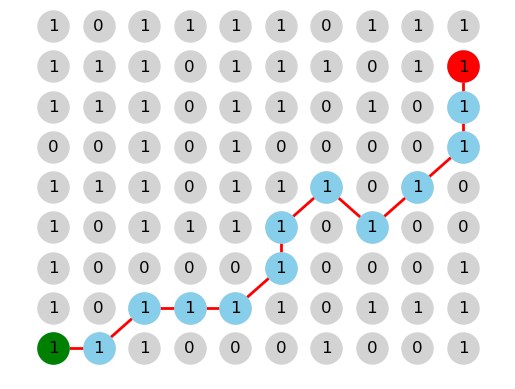

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Grid size
rows, cols = 5, 5

# Step 1: Create empty graph and add all nodes
G = nx.Graph()
for i in range(ROW):
    for j in range(COL):
        G.add_node((i, j))

# Step 2: Define your custom path (edges to show)
# Step 3: Add edges only between consecutive points in the path
for u, v in zip(plotPath[:-1], plotPath[1:]):
    G.add_edge(u, v)

# Step 4: Draw
pos = {(x, y): (y, -x) for x, y in G.nodes()}  # Flip y for visual clarity

labels = {(i, j): f"{arrayGrid[i][j]}" for i, j in G.nodes()}
# Draw all nodes
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=500)
# Highlight path nodes
nx.draw_networkx_nodes(G, pos, nodelist=plotPath, node_color='skyblue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=[(src[0],src[1])], node_color='green', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=[(dest[0],dest[1])], node_color='red', node_size=500)
# Draw only the specific edges
nx.draw_networkx_edges(G, pos, edgelist=list(zip(plotPath[:-1], plotPath[1:])), edge_color='red', width=2)

# Draw labels
nx.draw_networkx_labels(G, pos, labels=labels)
G.nodes[(8,0)]['color'] = 'green'

plt.axis('off')
print("Source:", src)
print("Destination", dest)
plt.show()

In [3]:
# Greedy Best Search - 2d Array
COL = 5
ROW = 5

greed_path = []
g_grid = []
g_src = []
g_dest = []
def trace_path(path):
    for node in path:
        print("-> ", node, end=" ")
def get_values(path, grid):
    for node in path:
        print("-> ", grid[node[0]][node[1]], end=' ')
def greedy_best_search(grid, src, dest):
    i = src[0]
    j = src[1]
    path_sum = grid[i][j]
    
    iL = (i < dest[0])
    iG = (i > dest[0])
    jL = (j < dest[1])
    jG = (j > dest[1])

    greed_path.append((i,j))
    
    while iL and jL:
        if grid[i][j + 1] < grid[i + 1][j]:
            j = j + 1
            jL = (j < dest[1])
        else:
            i = i + 1
            iL = (i < dest[0])
        path_sum = path_sum + grid[i][j]
        greed_path.append((i,j))
    while iL and jG:
        if grid[i][j - 1] < grid[i + 1][j]:
            j = j - 1
            jG = (j > dest[1])
        else:
            i = i + 1
            iL = (i < dest[0])
        path_sum = path_sum + grid[i][j]
        greed_path.append((i,j))
    while iG and jG:
        if grid[i][j - 1] < grid[i - 1][j]:
            j = j - 1
            jG = (j > dest[1])
        else:
            i = i - 1
            iG = (i > dest[0])
        path_sum = path_sum + grid[i][j]
        greed_path.append((i,j))
    while iG and jL:
        if grid[i][j + 1] < grid[i - 1][j]:
            j = j + 1
            jL = (j < dest[1])
        else:
            i = i - 1
            iG = (i > dest[0])
        path_sum = path_sum + grid[i][j]
        greed_path.append((i,j))
    while iL:
        i = i + 1
        iL = (i < dest[0])
        path_sum = path_sum + grid[i][j]
        greed_path.append((i,j))
    while iG:
        i = i - 1
        iG = (i > dest[0])
        path_sum = path_sum + grid[i][j]
        greed_path.append((i,j))
    while jL:
        j = j + 1
        jL = (j < dest[1])
        path_sum = path_sum + grid[i][j]
        greed_path.append((i,j))
    while jG:
        j = j - 1
        jG = (j > dest[1])
        path_sum = path_sum + grid[i][j]
        greed_path.append((i,j))
    
    print("Final path:")
    trace_path(greed_path)
    print("\nValues:")
    get_values(greed_path, grid)
    print("\nPath sum: ", path_sum)
        
def main():
    global g_grid, g_src, g_dest
    grid = np.random.randint(0, 15, size=(ROW, COL))
    g_grid = grid.copy()
    src = [np.random.randint(0, ROW), np.random.randint(0, COL)]
    dest = [np.random.randint(0, ROW), np.random.randint(0, COL)]
    g_src = src
    g_dest = dest
    print(src)
    print(dest)
    greedy_best_search(grid, src, dest)
    
main()

[0, 4]
[1, 1]
Final path:
->  (0, 4) ->  (1, 4) ->  (1, 3) ->  (1, 2) ->  (1, 1) 
Values:
->  10 ->  0 ->  14 ->  10 ->  4 
Path sum:  38


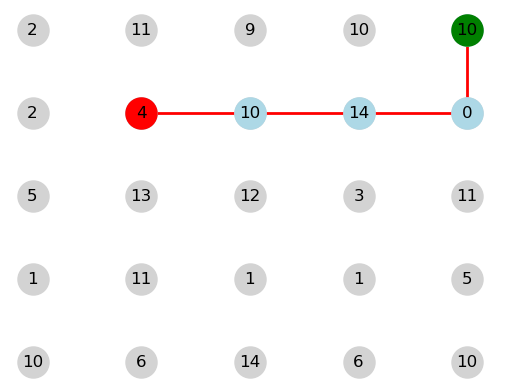

In [4]:
GG = nx.Graph()

for i in range(ROW):
    for j in range(COL):
        GG.add_node((i,j))

pos = {(x, y): (y, -x) for x, y in GG.nodes()}

labels = {(i, j): f"{g_grid[i][j]}" for i, j in GG.nodes()}

for u, v in zip(greed_path[:-1], greed_path[1:]):
    GG.add_edge(u, v)

nx.draw_networkx_nodes(GG, pos, node_color='lightgray', node_size=500)
nx.draw_networkx_nodes(GG, pos, nodelist=greed_path, node_color='lightblue', node_size=500)
nx.draw_networkx_nodes(GG, pos, nodelist=[(g_src[0],g_src[1])], node_color='green', node_size=500)
nx.draw_networkx_nodes(GG, pos, nodelist=[(g_dest[0],g_dest[1])], node_color='red', node_size=500)
nx.draw_networkx_edges(GG, pos, edgelist=list(zip(greed_path[:-1], greed_path[1:])), edge_color='red', width=2)
nx.draw_networkx_labels(GG, pos, labels=labels)

plt.axis('off')
plt.show()

In [5]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size

    def get_vertex_data(self):
        return self.vertex_data
    
    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            #self.adj_matrix[v][u] = weight   For undirected graph

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def dijkstra(self, start_vertex_data):
        start_vertex = self.vertex_data.index(start_vertex_data)
        distances = [float('inf')] * self.size
        distances[start_vertex] = 0
        visited = [False] * self.size

        for _ in range(self.size):
            min_distance = float('inf')
            u = None
            for i in range(self.size):
                if not visited[i] and distances[i] < min_distance:
                    min_distance = distances[i]
                    u = i

            if u is None:
                break

            visited[u] = True

            for v in range(self.size):
                if self.adj_matrix[u][v] != 0 and not visited[v]:
                    alt = distances[u] + self.adj_matrix[u][v]
                    if alt < distances[v]:
                        distances[v] = alt

        return distances

g = Graph(7)

g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')
g.add_vertex_data(5, 'F')
g.add_vertex_data(6, 'G')

g.add_edge(3, 0, 4)  # D -> A, weight 5
g.add_edge(3, 4, 2)  # D -> E, weight 2
g.add_edge(0, 2, 3)  # A -> C, weight 3
g.add_edge(0, 4, 4)  # A -> E, weight 4
g.add_edge(4, 2, 4)  # E -> C, weight 4
g.add_edge(4, 6, 5)  # E -> G, weight 5
g.add_edge(2, 5, 5)  # C -> F, weight 5
g.add_edge(1, 2, 2)  # B -> C, weight 2
g.add_edge(1, 5, 2)  # B -> F, weight 2
g.add_edge(6, 5, 5)  # G -> F, weight 5

# Dijkstra's algorithm from D to all vertices
print("Dijkstra's Algorithm starting from vertex D:\n")
distances = g.dijkstra('D')
for i, d in enumerate(distances):
    print(f"Shortest distance from D to {g.vertex_data[i]}: {d}")
d_nodes = g.vertex_data
d_edges = g.adj_matrix

Dijkstra's Algorithm starting from vertex D:

Shortest distance from D to A: 4
Shortest distance from D to B: inf
Shortest distance from D to C: 6
Shortest distance from D to D: 0
Shortest distance from D to E: 2
Shortest distance from D to F: 11
Shortest distance from D to G: 7


[[0, 0, 3, 0, 4, 0, 0], [0, 0, 2, 0, 0, 2, 0], [0, 0, 0, 0, 0, 5, 0], [4, 0, 0, 0, 2, 0, 0], [0, 0, 4, 0, 0, 0, 5], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 0]]


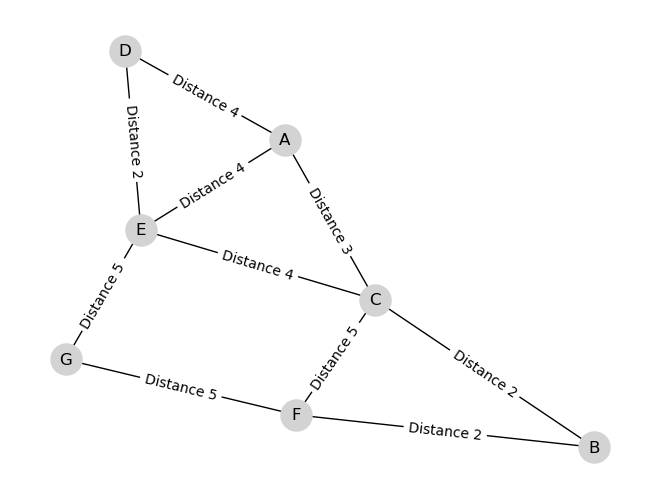

In [7]:
G = nx.Graph()
print(d_edges)
for i in range(len(d_nodes)):
    G.add_node(i)
for i in range(len(d_edges)):
    for j in range(len(d_edges[i])):
        if d_edges[i][j] != 0:
            G.add_edge(i, j, weight=d_edges[i][j], label=f'Distance {d_edges[i][j]}')
            
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'label')    
labels = {i: d_nodes[i] for i in G.nodes()} 
nx.draw(G, pos, labels=labels, node_color='lightgray', node_size=500)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()